# Students Performance in Exams

Getting raw data from my github

In [122]:
! wget https://raw.githubusercontent.com/Peter-Massarello/AI_Semester_Project/main/school-test-data-set.csv

--2021-02-27 17:05:34--  https://raw.githubusercontent.com/Peter-Massarello/AI_Semester_Project/main/school-test-data-set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14097 (14K) [text/plain]
Saving to: ‘school-test-data-set.csv.3’

school-test-data-se 100%[===================>]  13.77K  --.-KB/s    in 0s      

2021-02-27 17:05:34 (68.4 MB/s) - ‘school-test-data-set.csv.3’ saved [14097/14097]



Importing required modules, will add more as projet continues

In [123]:
# Imports Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [124]:
data = pd.read_csv('school-test-data-set.csv', delimiter = ',')
print("Amount of Rows in data set " + str(data.shape[0]))
print("Amount of Columns in data set " + str(data.shape[1]))
data.head()

Amount of Rows in data set 1000
Amount of Columns in data set 6


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,1,1,4,1,0,72
1,1,2,2,1,1,69
2,1,1,5,1,0,90
3,0,0,3,0,0,47
4,0,2,2,1,0,76


# Finding min, max, median, etc
Took the whole data set, but also showed just the math scores since that is the only column with numbers ranging past 5

In [125]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.518000,2.174000,2.081000,0.645000,0.358000,66.08900
std,0.499926,1.157179,1.460333,0.478753,0.479652,15.16308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000
50%,1.000000,2.000000,2.000000,1.000000,0.000000,66.00000
75%,1.000000,3.000000,3.000000,1.000000,1.000000,77.00000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000


In [126]:
data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

# Graphing inital graphs of data before Normalization

Need to come back and create a loop that creates these graphs. I was having trouble getting the histogram to look like I needed it to in the first place so I went with this method for now so I could turn it in and fix in the next phase

In [127]:
dataset = np.genfromtxt('school-test-data-set.csv', delimiter = ',', skip_header = True)

Text(0.5, 69.0, 'Test Score')

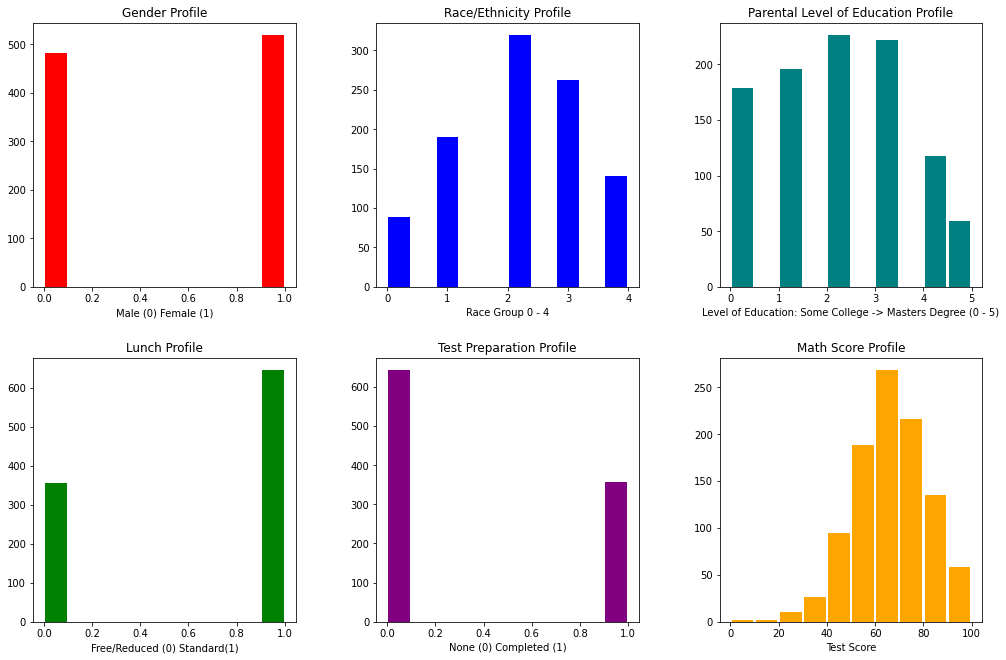

In [128]:
columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score']
columnsLen = len(columns) # Size of columns
colorSet = ["red", "blue", "yellow", "green", "purple", "yellow"] # Array of colors that each subplot will be

fig, axs = plt.subplots(2, 3, figsize = (15, 10))
fig.subplots_adjust(top=0.8)
fig.tight_layout(pad = 5.0)
# COME BACK TO THIS
axs[0, 0].hist(dataset[:, 0], color = "red", rwidth=0.9)
axs[0, 0].set_title("Gender Profile")
axs[0, 0].set_xlabel("Male (0) Female (1)")
axs[0, 1].hist(dataset[:, 1], color = "blue", rwidth=0.9)
axs[0, 1].set_title("Race/Ethnicity Profile")
axs[0, 1].set_xlabel("Race Group 0 - 4")
axs[0, 2].hist(dataset[:, 2], color = "teal", rwidth=0.9)
axs[0, 2].set_title("Parental Level of Education Profile")
axs[0, 2].set_xlabel("Level of Education: Some College -> Masters Degree (0 - 5)")
axs[1, 0].hist(dataset[:, 3], color = "green", rwidth=0.9)
axs[1, 0].set_title("Lunch Profile")
axs[1, 0].set_xlabel("Free/Reduced (0) Standard(1)")
axs[1, 1].hist(dataset[:, 4], color = "purple", rwidth=0.9)
axs[1, 1].set_title("Test Preparation Profile")
axs[1, 1].set_xlabel("None (0) Completed (1)")
axs[1, 2].hist(dataset[:, 5], color = "orange", rwidth=0.9)
axs[1, 2].set_title("Math Score Profile")
axs[1, 2].set_xlabel("Test Score")

# Graphs with a large disparity between their binary values

Text(0.5, 69.0, 'None (0) Completed (1)')

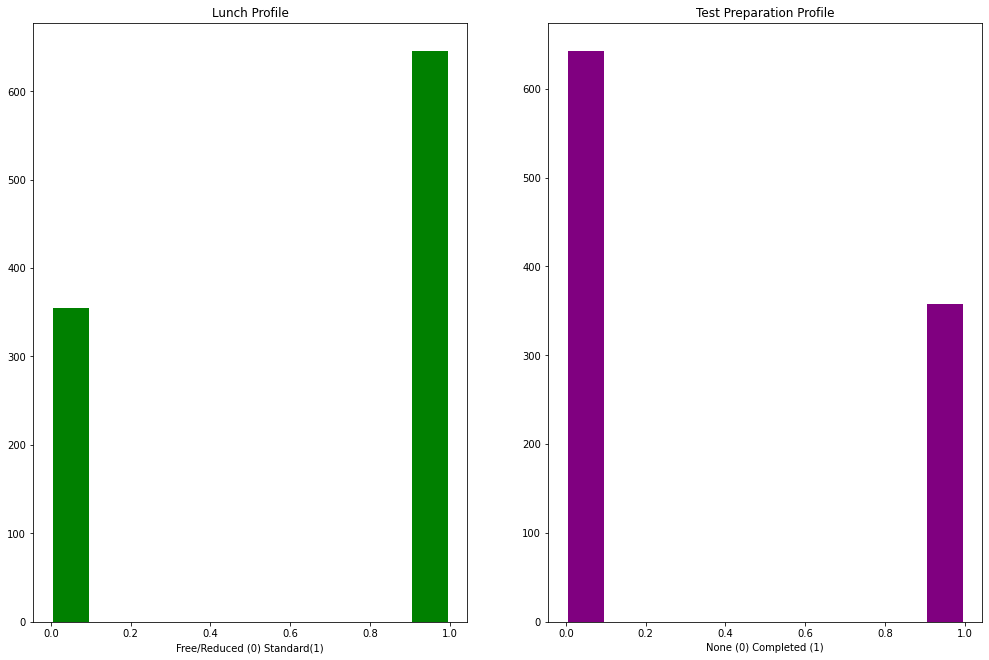

In [133]:
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.subplots_adjust(top=0.8)
fig.tight_layout(pad = 5.0)
axs[0].hist(dataset[:, 3], color = "green", rwidth=0.9)
axs[0].set_title("Lunch Profile")
axs[0].set_xlabel("Free/Reduced (0) Standard(1)")
axs[1].hist(dataset[:, 4], color = "purple", rwidth=0.9)
axs[1].set_title("Test Preparation Profile")
axs[1].set_xlabel("None (0) Completed (1)")

In [129]:
math_max = dataset[:, 5].max() # Takes max value from math score column
race_max = dataset[:, 1].max() # Take the max from the race column
parent_max = dataset[:, 2].max() # Take the max from the parent column
print(math_max, race_max, parent_max)
dataset[:, 5] = dataset[:, 5] / math_max
dataset[:, 1] = dataset[:, 1] / race_max
dataset[:, 2] = dataset[:, 2] / parent_max

100.0 4.0 5.0


Text(0.5, 33.0, 'Test Score')

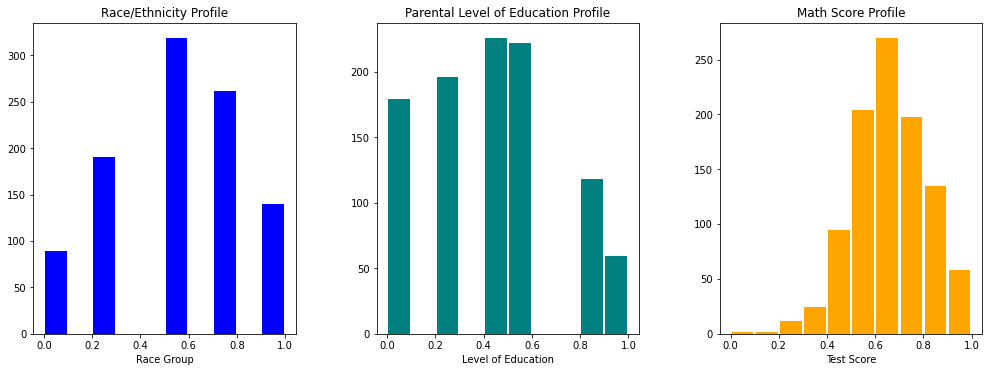

In [130]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
fig.subplots_adjust(top=0.8)
fig.tight_layout(pad = 5.0)

axs[0].hist(dataset[:, 1], color = "blue", rwidth=0.9)
axs[0].set_title("Race/Ethnicity Profile")
axs[0].set_xlabel("Race Group")

axs[1].hist(dataset[:, 2], color = "teal", rwidth=0.9)
axs[1].set_title("Parental Level of Education Profile")
axs[1].set_xlabel("Level of Education")

axs[2].hist(dataset[:, 5], color = "orange", rwidth=0.9)
axs[2].set_title("Math Score Profile")
axs[2].set_xlabel("Test Score")